# **Task - 1:**

Repeat all the task from worksheet - 5 but, try to improve the model from last week with same dataset.

• Use Data Augmentation to increase the number of training image.

• Use deeper model with BN and DropOut layer as presented above.

• Understand the Model Summary and Training Behavior.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#train image data
train_df = "/content/drive/MyDrive/AI and ML/week 5/FruitinAmazon/train"

#test image data
test_df = "/content/drive/MyDrive/AI and ML/week 5/FruitinAmazon/test"

In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [4]:
import os
# Get class names (subdirectories)
class_names = sorted(os.listdir(train_df))

if not class_names:
    print("No class directories found in the train folder!")
else:
    print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [5]:
from PIL import Image, UnidentifiedImageError
corrupted_images = []  # List to store corrupted image paths

# Loop through each class folder and check for corrupted images
for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):  # Ensure it’s a valid directory
        images = os.listdir(class_path)
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print("\nCorrupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("\nNo corrupted images found.")



No corrupted images found.


In [6]:
# Dictionary to store class counts
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)  # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


In [7]:
selected_images = []  # Store image paths
selected_labels = []  # Store corresponding class names

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if images:  # Ensure the class folder is not empty
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

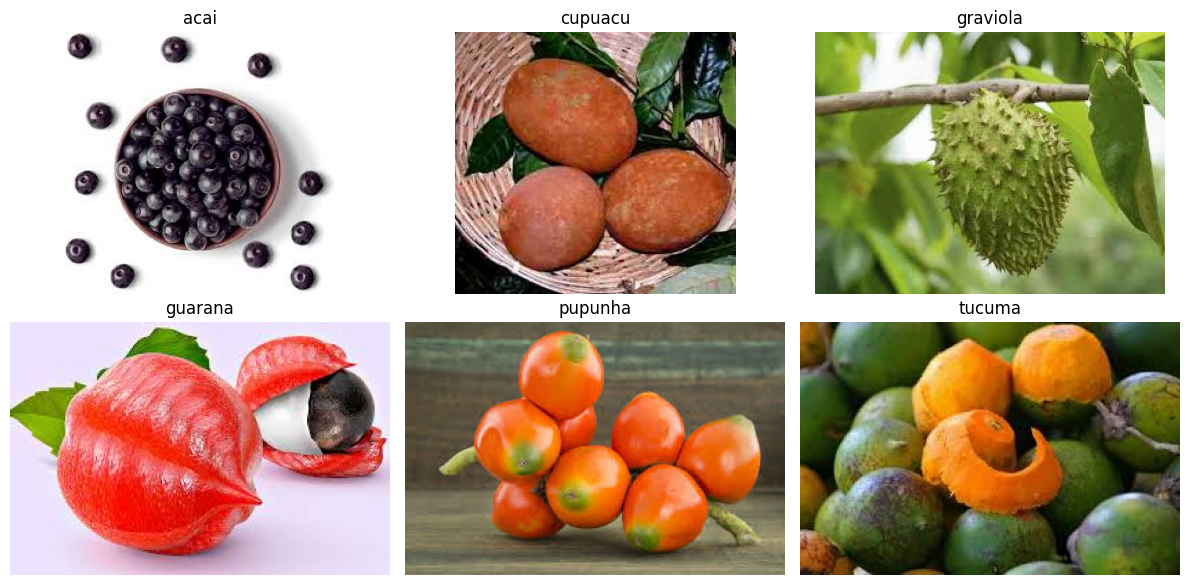

In [8]:
import matplotlib.image as mpimg

# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Determine number of columns
rows = 2  # Fixed number of rows for layout

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")  # Hide unused subplots

plt.tight_layout()
plt.show()

In [9]:
def load_datasets(dataset_path, img_size=(128, 128), batch_size=32):
    train_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    val_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    return train_ds, val_ds

train_ds, val_ds = load_datasets(train_df)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [10]:
def build_cnn_model(input_shape, num_classes):
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return cnn_model

# Example usage:
input_shape = (128, 128, 3)
class_names = train_ds.class_names
cnn_model = build_cnn_model(input_shape, len(class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
def compile_model(model):
    cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return cnn_model

# Example usage:
cnn_model = compile_model(cnn_model)
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
def train_model(model, train_ds, val_ds, epochs=250, batch_size=16):
    callbacks = [
        keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
    cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    return cnn_model

# Example usage:
cnn_model = train_model(cnn_model, train_ds, val_ds)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.2396 - loss: 144.7119

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 638ms/step - accuracy: 0.2422 - loss: 156.7021 - val_accuracy: 0.1667 - val_loss: 376.0023
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.1441 - loss: 378.0993

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 497ms/step - accuracy: 0.1497 - loss: 363.7595 - val_accuracy: 0.1667 - val_loss: 56.6456
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.1499 - loss: 48.6708

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 544ms/step - accuracy: 0.1506 - loss: 47.0326 - val_accuracy: 0.2222 - val_loss: 6.5805
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.2656 - loss: 4.9727

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 676ms/step - accuracy: 0.2617 - loss: 4.8276 - val_accuracy: 0.1111 - val_loss: 3.1302
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4965 - loss: 1.5345

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4870 - loss: 1.5270 - val_accuracy: 0.2222 - val_loss: 3.0109
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.6100 - loss: 1.0023

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6102 - loss: 1.0156 - val_accuracy: 0.2222 - val_loss: 2.3052
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.8166 - loss: 0.7415

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 550ms/step - accuracy: 0.8069 - loss: 0.7483 - val_accuracy: 0.3333 - val_loss: 2.2933
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.7894 - loss: 0.6471

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 781ms/step - accuracy: 0.7934 - loss: 0.6526 - val_accuracy: 0.4444 - val_loss: 2.1912
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 433ms/step - accuracy: 0.9145 - loss: 0.5117 - val_accuracy: 0.3333 - val_loss: 2.7529
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 512ms/step - accuracy: 0.9497 - loss: 0.3255 - val_accuracy: 0.2778 - val_loss: 3.1543
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 498ms/step - accuracy: 0.9783 - loss: 0.1728 - val_accuracy: 0.2778 - val_loss: 3.8908
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 509ms/step - accuracy: 0.9627 - loss: 0.1112 - val_accuracy: 0.4444 - val_loss: 4.2627
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 636ms/step - accuracy: 1.0000 - loss: 0.0352 - val_accuracy: 0.5000 - val_loss: 4.8185
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 773ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.4444 - val_loss: 4.8329
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 493ms/step - accuracy: 1.0000 - loss: 8.7495e-04 - val_accuracy: 0.3333 - val

In [13]:
def evaluate_model(model, test_ds):
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    #return test_loss, test_acc

# Example usage:
evaluate_model(cnn_model, val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.4444 - loss: 2.1912
Test Accuracy: 0.4444
Test Loss: 2.1912


In [14]:
def save_model(model, filename="model.h5"):
    model.save(filename)

def load_model(filename="model.h5"):
    return keras.models.load_model(filename)

save_model(cnn_model)
cnn_model = load_model()

In [15]:
from sklearn.metrics import classification_report

In [16]:
def make_predictions(model, test_ds, class_names):
    y_true, y_pred = [], []

    for images, labels in test_ds:
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    print(classification_report(y_true, y_pred, target_names=class_names))

make_predictions(cnn_model, val_ds, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
              precision    recall  f1-score   support

        acai       0.50      0.67      0.57         3
     cupuacu       1.00      0.50      0.67         4
    graviola       0.33      1.00      0.50         1
     guarana       0.33      0.33      0.33         3
     pupunha       0.40      0.50      0.44         4
      tucuma       0.00      0.00      0.00         3

    accuracy                           0.44        18
   macro avg       0.43      0.50      0.42        18
weighted avg       0.47      0.44      0.43        18



In [17]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, BatchNormalization,
                                     Activation, Flatten, Dense)
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [18]:
# Define augmentation layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),  # Added zoom
    layers.RandomContrast(0.1),  # Added contrast
]

# Define augmentation function
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [19]:
# Build the model
model = Sequential([
    # Data augmentation using Lambda
    layers.Lambda(data_augmentation, input_shape=(128, 128, 3)),  #should match

    # Normalize pixel values to [0, 1]
    layers.Rescaling(1./255),

    # Block 1
    Conv2D(32, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten + Dense Layers
    Flatten(),

    Dense(512, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output layer - 6 classes for your dataset
    Dense(6, activation='softmax')  # 6 classes, so 6 neurons
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]

# Train the model (assuming train_ds and val_ds are already loaded)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1447 - loss: 2.6681

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.1467 - loss: 2.6519 - val_accuracy: 0.1667 - val_loss: 1.7846
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.2439 - loss: 1.9618 - val_accuracy: 0.0556 - val_loss: 1.8101
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4232 - loss: 1.5713 - val_accuracy: 0.0556 - val_loss: 1.8933
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4457 - loss: 1.4719 - val_accuracy: 0.0556 - val_loss: 1.9956
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.4705 - loss: 1.3416 - val_accuracy: 0.0556 - val_loss: 2.1890
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5755 - loss: 1.1050 - val_accuracy: 0.0556 - val_loss: 2.3623
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5816 - loss: 1.1116 - val_accuracy: 0.2222 - val_loss: 2.4333
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6437 - loss: 0.9185 - val_accuracy: 0.2222 - val_loss: 2.4926
Epoch 9/50
3/3 ━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Task - 2:**

To - Do:

• Implement transfer learning using a pre-trained model trained on ImageNet weights, freeze the
layers of the model, and fit it only on the output layer to classify the fruits dataset.

• Evaluate the model’s performance and generate an inference output and classification report.

• Did the performance improved compared to training from scratch.

Expected Deliverables:

• Trained Model: A trained model with the frozen layers and fine-tuned output layer.

• Inference Output: Predicted class labels for the validation dataset.

• Classification Report: A detailed classification report showing the performance of the model for
each class.

In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet',  # Fixed quotes from curly to straight
                  include_top=False,
                  input_shape=(128, 128, 3))  # Input shape for VGG16


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Added dropout for regularization
x = Dense(512, activation='relu')(x)  # Added another dense layer
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)  # 6 classes

In [23]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model - CHANGED to sparse_categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
             loss='sparse_categorical_crossentropy',  # Changed from categorical
             metrics=['accuracy'])
# Callbacks
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

In [24]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Transfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1539 - loss: 15.7291

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.1606 - loss: 15.6951 - val_accuracy: 0.1667 - val_loss: 5.2548
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1441 - loss: 13.6126

3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 0.1497 - loss: 13.5451 - val_accuracy: 0.1667 - val_loss: 4.3837
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1991 - loss: 12.2756

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.2049 - loss: 12.1446 - val_accuracy: 0.1667 - val_loss: 4.2305
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2743 - loss: 10.4850

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.2786 - loss: 10.4127 - val_accuracy: 0.2222 - val_loss: 4.0046
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1192 - loss: 10.9115

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.1241 - loss: 11.0124 - val_accuracy: 0.3333 - val_loss: 3.7683
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3594 - loss: 8.8502

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.3633 - loss: 8.8929 - val_accuracy: 0.3889 - val_loss: 3.6069
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3501 - loss: 8.3690

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.3494 - loss: 8.3821 - val_accuracy: 0.3889 - val_loss: 3.1991
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3646 - loss: 7.1823

3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.3672 - loss: 7.0830 - val_accuracy: 0.5556 - val_loss: 2.7858
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2587 - loss: 6.9983

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.2669 - loss: 6.8322 - val_accuracy: 0.5556 - val_loss: 2.4068
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2737 - loss: 6.4616

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.2817 - loss: 6.3487 - val_accuracy: 0.5556 - val_loss: 2.1665
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3999 - loss: 6.5916

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.4006 - loss: 6.5582 - val_accuracy: 0.5000 - val_loss: 2.0496
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.3945 - loss: 5.9845 - val_accuracy: 0.5000 - val_loss: 2.1218
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.3889 - loss: 5.5449 - val_accuracy: 0.5000 - val_loss: 2.2985
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.4674 - loss: 6.3998 - val_accuracy: 0.5000 - val_loss: 2.5368
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.4618 - loss: 4.9650 - val_accuracy: 0.5000 - val_loss: 2.7922
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.5234 - loss: 4.1471 - val_accuracy: 0.5000 - val_loss: 2.9727
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 2.0496
Transfer Learning Model Accuracy: 0.5000
Transfer Learning Model Loss: 2.0496

Classification Report:
              precision    recall  f1-score   support

        acai       0.67      0.67  

In [25]:
from sklearn.metrics import classification_report

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=42
)

class_names = train_ds.class_names
num_classes = len(class_names)

# 2. Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# 3. Build Transfer Learning Model
inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Resizing(224, 224)(x)  # Resize to VGG16 expected input

# Load VGG16 base model
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze base model

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)

# 4. Compile the Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 5. Train the Model
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# 6. Evaluate the Model
test_loss, test_acc = model.evaluate(val_ds)
print(f"\nTransfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# 7. Generate Classification Report
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,980,422 (57.15 MB)

 Trainable params: 265,734 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1545 - loss: 1.9229 

3/3 ━━━━━━━━━━━━━━━━━━━━ 64s 22s/step - accuracy: 0.1576 - loss: 1.9259 - val_accuracy: 0.1667 - val_loss: 1.9140
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1539 - loss: 1.9448 

3/3 ━━━━━━━━━━━━━━━━━━━━ 70s 17s/step - accuracy: 0.1606 - loss: 1.9356 - val_accuracy: 0.1667 - val_loss: 1.8964
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1701 - loss: 1.8055 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 17s/step - accuracy: 0.1693 - loss: 1.8086 - val_accuracy: 0.2222 - val_loss: 1.8827
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1551 - loss: 1.8541 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 17s/step - accuracy: 0.1545 - loss: 1.8541 - val_accuracy: 0.1667 - val_loss: 1.8687
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2147 - loss: 1.8147 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 17s/step - accuracy: 0.2166 - loss: 1.8142 - val_accuracy: 0.1111 - val_loss: 1.8591
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.2101 - loss: 1.8062 

3/3 ━━━━━━━━━━━━━━━━━━━━ 59s 21s/step - accuracy: 0.2096 - loss: 1.8082 - val_accuracy: 0.1111 - val_loss: 1.8560
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.3009 - loss: 1.7208 

3/3 ━━━━━━━━━━━━━━━━━━━━ 59s 21s/step - accuracy: 0.2951 - loss: 1.7277 - val_accuracy: 0.1111 - val_loss: 1.8528
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.3108 - loss: 1.7356 

3/3 ━━━━━━━━━━━━━━━━━━━━ 78s 17s/step - accuracy: 0.3060 - loss: 1.7332 - val_accuracy: 0.1111 - val_loss: 1.8469
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.3050 - loss: 1.7660 

3/3 ━━━━━━━━━━━━━━━━━━━━ 85s 21s/step - accuracy: 0.3051 - loss: 1.7623 - val_accuracy: 0.1111 - val_loss: 1.8418
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.1395 - loss: 1.8299 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 21s/step - accuracy: 0.1428 - loss: 1.8308 - val_accuracy: 0.1111 - val_loss: 1.8381
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1788 - loss: 1.7645 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 21s/step - accuracy: 0.1862 - loss: 1.7577 - val_accuracy: 0.1667 - val_loss: 1.8340
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2135 - loss: 1.8047 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 16s/step - accuracy: 0.2227 - loss: 1.7996 - val_accuracy: 0.1667 - val_loss: 1.8283
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2778 - loss: 1.8547 

3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 17s/step - accuracy: 0.2917 - loss: 1.8324 - val_accuracy: 0.2222 - val_loss: 1.8204
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3351 - loss: 1.6596 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 17s/step - accuracy: 0.3346 - loss: 1.6577 - val_accuracy: 0.1667 - val_loss: 1.8135
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.2500 - loss: 1.7214 

3/3 ━━━━━━━━━━━━━━━━━━━━ 60s 21s/step - accuracy: 0.2500 - loss: 1.7206 - val_accuracy: 0.1667 - val_loss: 1.8061
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.2448 - loss: 1.7312 

3/3 ━━━━━━━━━━━━━━━━━━━━ 73s 16s/step - accuracy: 0.2461 - loss: 1.7256 - val_accuracy: 0.1667 - val_loss: 1.7963
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3704 - loss: 1.6281 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 17s/step - accuracy: 0.3681 - loss: 1.6323 - val_accuracy: 0.2222 - val_loss: 1.7855
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3200 - loss: 1.6677 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 17s/step - accuracy: 0.3199 - loss: 1.6675 - val_accuracy: 0.2222 - val_loss: 1.7754
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.2888 - loss: 1.6809 

3/3 ━━━━━━━━━━━━━━━━━━━━ 59s 21s/step - accuracy: 0.2964 - loss: 1.6728 - val_accuracy: 0.2222 - val_loss: 1.7700
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.2789 - loss: 1.6966 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 21s/step - accuracy: 0.2856 - loss: 1.6931 - val_accuracy: 0.2222 - val_loss: 1.7673
Epoch 21/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.2998 - loss: 1.7241 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 21s/step - accuracy: 0.3012 - loss: 1.7167 - val_accuracy: 0.2222 - val_loss: 1.7671
Epoch 22/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2500 - loss: 1.6864 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 16s/step - accuracy: 0.2500 - loss: 1.6809 - val_accuracy: 0.2778 - val_loss: 1.7645
Epoch 23/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.4144 - loss: 1.5091 

3/3 ━━━━━━━━━━━━━━━━━━━━ 50s 17s/step - accuracy: 0.4184 - loss: 1.5027 - val_accuracy: 0.3333 - val_loss: 1.7624
Epoch 24/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3958 - loss: 1.5600 

3/3 ━━━━━━━━━━━━━━━━━━━━ 50s 16s/step - accuracy: 0.3906 - loss: 1.5610 - val_accuracy: 0.3333 - val_loss: 1.7564
Epoch 25/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.3148 - loss: 1.6123 

3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 21s/step - accuracy: 0.3160 - loss: 1.6107 - val_accuracy: 0.3333 - val_loss: 1.7488
Epoch 26/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.4965 - loss: 1.5063 

3/3 ━━━━━━━━━━━━━━━━━━━━ 50s 16s/step - accuracy: 0.4870 - loss: 1.5164 - val_accuracy: 0.3333 - val_loss: 1.7451
Epoch 27/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3553 - loss: 1.6041 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 16s/step - accuracy: 0.3533 - loss: 1.6081 - val_accuracy: 0.3333 - val_loss: 1.7437
Epoch 28/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3345 - loss: 1.5952 

3/3 ━━━━━━━━━━━━━━━━━━━━ 51s 16s/step - accuracy: 0.3377 - loss: 1.5986 - val_accuracy: 0.3333 - val_loss: 1.7418
Epoch 29/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3443 - loss: 1.6155 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 17s/step - accuracy: 0.3485 - loss: 1.6152 - val_accuracy: 0.3333 - val_loss: 1.7410
Epoch 30/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3704 - loss: 1.5473 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 17s/step - accuracy: 0.3681 - loss: 1.5488 - val_accuracy: 0.3889 - val_loss: 1.7407
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3889 - loss: 1.7407

Transfer Learning Model Accuracy: 0.3889
Transfer Learning Model Loss: 1.7407

Classification Report:
              precision    recall  f1-score   support

        acai       1.00      0.33      0.50         3
     cupuacu       0.67      0.50      0.57         4
    graviola       0.17      1.00      0.29         1
     guarana       0.40      0.67      0.50         3
     pupunha       0.00      0.00      0.00         4
      tucuma       0.33      0.33      0.33         3

    accuracy                           0.39        18
   macro avg       0.43      0.47      0.37        18
weighted avg       0.45      0.39      0.37        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
